# Analysis of Pharamceutical Regimens on Mice 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


#Merge the two data frames
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

#display data for preview 
mouse_study_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Begin Data Cleaning

In [2]:
#Find total amount of mice in the study 
total_mouse = mouse_study_df['Mouse ID'].unique()
total_mouse = len(total_mouse)
print(f' The total mice in the study are {total_mouse}')

 The total mice in the study are 249


In [3]:
#Identify the unique entries 
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
#Identify the fact that there are replicate entries for tumor vol. at every timepoint. 
duplicate_data = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Look at data excluding mouse g989 because that mouse has the replicte entries.    
clean_data = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#how many total mice are there that have no replicate entries and are totally unique.
total_clean_mouse = clean_data['Mouse ID'].nunique()
total_clean_mouse

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [8]:
meantumorvol = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
mediantumorvol = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumorvariance = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumorstdv = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumorstderr = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [9]:
drugregimen_sum = pd.DataFrame({ 'Mean Tumor Volume' : meantumorvol,
                               'Median Tumor Volume' : mediantumorvol,
                               'Tumor Volume Variance' : tumorvariance,
                               'Tumor Volume Std Dev.' : tumorstdv,
                               'Tumor Volume Std Err.' : tumorstderr})
drugregimen_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#assemble summary statistics table describing tumor volume variance under each unique regimen.
drugregime_agg_sum = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var', 'std','sem'])
drugregime_agg_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Begin Exploratory Visualization

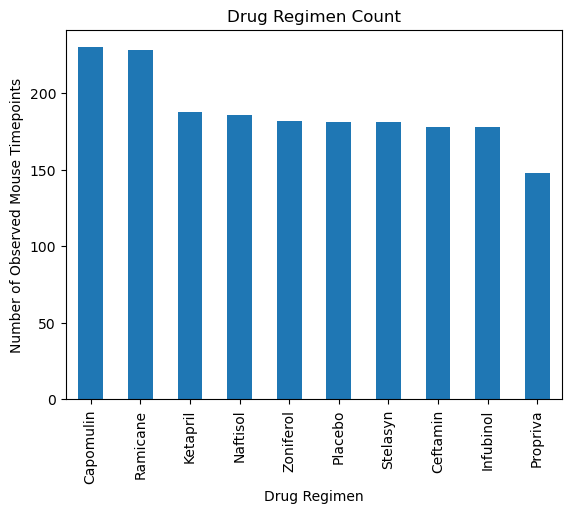

In [11]:
#Observe the number of measurement timepoints per drug regimen.
regimenbymousecnt = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].count()
regimenbymousecnt = regimenbymousecnt.sort_values(ascending = False)
regimenbymousecnt


regimenbymousecnt.plot(kind = 'bar', title = 'Drug Regimen Count', ylabel = 'Number of Observed Mouse Timepoints')
plt.show()


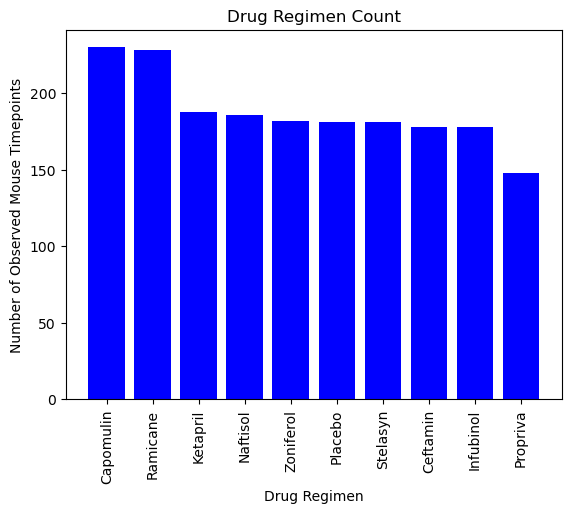

In [12]:
#Visualize the same graph from above, but using matplotlib instead of pandas.
x = regimenbymousecnt.index
y = regimenbymousecnt.values
plt.bar(x, y, color ='blue')
 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("Drug Regimen Count")
plt.xticks(rotation = 90)
plt.show()


<Axes: ylabel='Sex'>

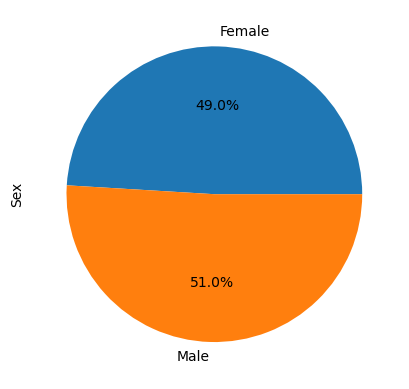

In [13]:
#The observed mice were virtually proportionate, visualized by a pandas pie chart.
mousesexdis = clean_data.groupby(['Sex'])['Tumor Volume (mm3)'].count()
mousesexdis

mousesexdis.plot(kind = 'pie', ylabel = 'Sex', autopct='%1.1f%%')

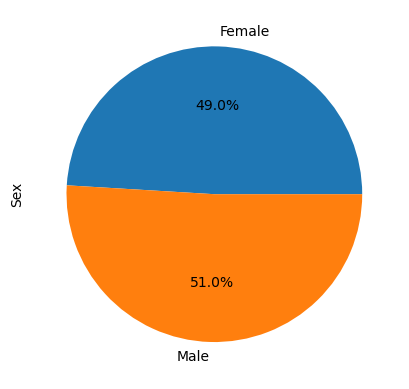

In [14]:
#The same graph as above, constructed with matplotlib instead of pandas.

plt.pie(mousesexdis.values, autopct='%1.1f%%', labels=mousesexdis.index)
plt.ylabel('Sex')
plt.show()

In [15]:
#Look at the distribution of final tumor volumes by first grabing unique mice and their subsequent ending measurement timepoint.
finaltimpoint = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
finaltimpoint = finaltimpoint.to_frame().reset_index()
finaltimpoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:
finaltp_df = pd.merge(finaltimpoint, clean_data, on = ['Mouse ID', 'Timepoint'], how = 'left')
finaltp_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
#Use a for loop to calculate tumor volume variance in four drug regimes at the final measurement timpoint for all associated mice.
fourregimeslist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumorvol = []
#tumors = None
for drug in fourregimeslist:
    drug_tumor_s = finaltp_df.loc[finaltp_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumorvol.append(drug_tumor_s)
    q1 = drug_tumor_s.quantile(0.25)
    q3 = drug_tumor_s.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outlier_ser = drug_tumor_s.loc[(drug_tumor_s < fence_low) | (drug_tumor_s > fence_high)]
    print(outlier_ser)
    


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


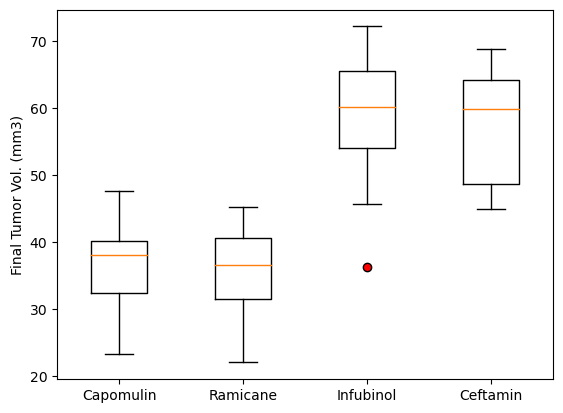

In [18]:
#Create box plot representing the distribution

plt.boxplot(tumorvol, labels=fourregimeslist, flierprops={'markerfacecolor': 'r'})
plt.ylabel('Final Tumor Vol. (mm3)')
plt.show()



In [19]:
#Identify a single mouses tumor volume throughout the study that was treated with Capomulin. 


#drug_tumor_s = merged_df.loc[merged_df['Drug Regimen']==drug]['Tumor Volume (mm3)']

capo_fil_ser = clean_data['Drug Regimen']=='Capomulin'

capomulin_df = clean_data[capo_fil_ser]

capomulin_mouse_id = capomulin_df.iloc[0]['Mouse ID']
capomulin_mouse_id

's185'

In [20]:
#Create the total tumor meausrements data frame for Capomulin mouse 's185'.

one_capomulin_filter = clean_data['Mouse ID']== capomulin_mouse_id
one_capomulin_mouse_df = clean_data[one_capomulin_filter][['Timepoint', 'Tumor Volume (mm3)']]
one_capomulin_mouse_df



,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


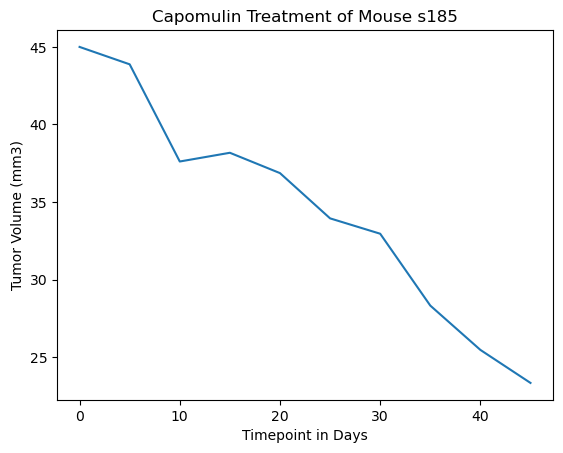

In [21]:
#For Capomulin mouse 's185', the treatment seemed to have significant effect in reducing tumor volume. 

plt.plot(one_capomulin_mouse_df['Timepoint'], one_capomulin_mouse_df['Tumor Volume (mm3)']) 
plt.xlabel('Timepoint in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse s185')
plt.show()

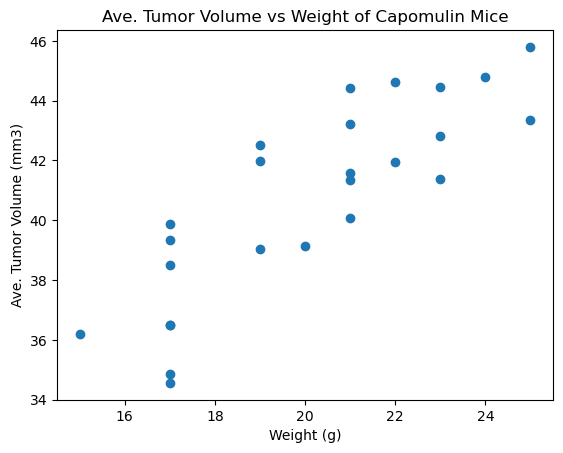

In [22]:
#Look at the relationship between weight and ave. tumor volume in mice treated with Capomuin. 

meanweight_df = capomulin_df.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()

meanweight_df

plt.scatter(meanweight_df['Weight (g)'], meanweight_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Ave. Tumor Volume (mm3)')
plt.title('Ave. Tumor Volume vs Weight of Capomulin Mice')
plt.show()

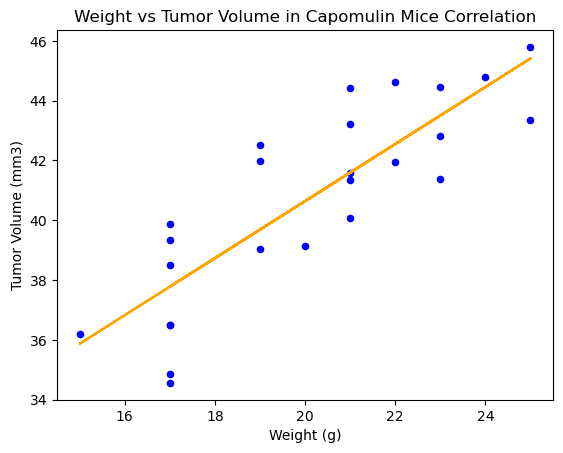

The correlation between Weight (g) and Tumor Volume in Capomulin Mice is 0.84


In [23]:
#Calculate the Pearson correlation coefficient of average tumor volume and weight of mice treated with Capomulin.

results_list=st.linregress(meanweight_df['Weight (g)'],meanweight_df['Tumor Volume (mm3)'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=meanweight_df['Weight (g)']
y_pred=slope*np.array(x)+intercept
meanweight_df.plot.scatter(['Weight (g)'],['Tumor Volume (mm3)'],xlabel='Weight (g)',ylabel='Tumor Volume (mm3)' ,title= 'Weight vs Tumor Volume in Capomulin Mice Correlation' ,color='blue')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y_pred, color = 'orange')
plt.annotate(line_eq, (.09, .02), fontsize=12,color="orange")

model = st.linregress(meanweight_df["Weight (g)"],meanweight_df["Tumor Volume (mm3)"])
y_values = meanweight_df["Weight (g)"]*model[0] + model[1]
plt.plot(x, y_values,color='orange')

plt.show()

correlation1= st.pearsonr(meanweight_df["Weight (g)"], meanweight_df["Tumor Volume (mm3)"])
print(f"The correlation between Weight (g) and Tumor Volume in Capomulin Mice is {round(correlation1[0],2)}")
